<a href="https://colab.research.google.com/github/MengxuanMa2016/Data_Visualization_Python/blob/master/Efficiency_Assessment_Results_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Efficiency Assessment Result Visualization**

The purpose of this notebook is to visaulize the processed assessment results of a stroke player. 

Main steps: 
a. Load the generetated assessment file in csv. 

## Load the necessary libraries

In [0]:
from numpy import genfromtxt
import numpy as np, pandas as pd
from IPython.display import display, HTML
from matplotlib import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import seaborn as sns
import csv

import scipy.stats as stats
import statsmodels as sm

import warnings
warnings.filterwarnings('ignore')

## Link the notebook to the google drive to import the file

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [22]:
# list data files are available in the data directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

path = "/content/gdrive/My Drive/Internship/_paper-preparation/Assessment_Result-Round1/"

from subprocess import check_output
print(check_output(["ls", path]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Efficiency_Assessment_Results_Visualization.ipynb
HS2-ALL-efficiency_metrics011819.csv
HS2-ALL-trial_list011819.csv
KL30-ALL-efficiency_metrics012019.csv



In [0]:
stroke_data_file = 'HS2-ALL-efficiency_metrics011819.csv'
stroke_trial_file = 'HS2-ALL-trial_list011819.csv'
healthy_data_file = 'KL30-ALL-efficiency_metrics012019.csv'

In [0]:
print("File to be imported: " + data_dir + file_name)
data = pd.read_csv(data_dir + file_name)

print("\n\nThe first 5 rows of the imported data:")
print(data.head())

## Some functions

In [0]:
def read_trial_label(trial):
    label = []
    with open(trial, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            label.append(row[0])
#     partial_label = [x[0:5] for x in label]
      
#     return partial_label
    return label

In [0]:
def read_joint_file(trial):
    """
    read_joint_file method: read the joint file(.csv) to an array
    :param
        num_of_column: number of columns for joints in the file. Use for testing.
    :return:
        an array of data read from the file.
    """
    print("Reading the outcome result...")
    # For testing purpose
    # file_data= np.array([2,3,1,0])
    # self.data = file_data

    # read the actual data from .csv file
    file_data = genfromtxt(trial, delimiter=',')
    # print(type(file_data))

    # self.data = file_data[5:] # loading Vicon data
    data_raw = file_data[:]

    # if self.data_raw.shape[1] != num_of_column:
    #     print('Warning: Number of joint columns is not {0}!'.format(num_of_column))

    print("Finish Reading the data for assessment!")

    # print(self.dataRaw[:,0]) # Check the first column of the raw data

    return data_raw

## Import the base line: Healthy subjects assessment results

In [32]:
healthy_data = read_joint_file(path + healthy_data_file)
print (type(healthy_data))

Reading the outcome result...
Finish Reading the data for assessment!
<class 'numpy.ndarray'>


## Import the stroke data

In [64]:
stroke_data = read_joint_file(path + stroke_data_file)

print("stroke data:\n" + str(stroke_data[:3,:]))
print(stroke_data.shape)


trial_label = read_trial_label(path + stroke_trial_file)
trial_label = np.reshape(np.asarray(trial_label), (-1,1)) # -1 remain that dimension to be unknown. It will be calculated automatically. 
print("trial_label: \n" + str(trial_label[:5]))
print(trial_label.shape)

Reading the outcome result...
Finish Reading the data for assessment!
stroke data:
[[  0.298619   0.479203  91.830021  67.751673   0.212321   0.53821
  166.005211  63.539319]
 [  0.378951   0.705728 162.340129  18.089093   0.382903   0.521923
  187.79659   50.581384]
 [  0.228322   0.247417 143.092305 145.522467   0.478913   0.254047
  187.365299 196.856654]]
(141, 8)
trial_label: 
[['10-24-2013_02-12-PM_Janet_Ronlyreaching']
 ['10-29-2013_04-28-PM_Janet_Ronlyreaching']
 ['10-29-2013_05-48-PM_Janet_sittingoutofBOS']
 ['10-31-2013_06-30-PM_Janet_Ronlyreaching']
 ['11-02-2013_04-55-PM_Janet_tallkneeling']]
(141, 1)


## Build up a panda table of the stroke assessment data

In [63]:
headers = ['trials', 'Left_Path_Ratio_2d',	'Right_Path_Ratio_2d',	'Left_Sway_Dist_2d',	'Right_Sway_Dist_2d',	'Left_Path_Ratio_3d',	'Right_Path_Ratio_3d',	'Left_Sway_Dist_3d', 'Right_Sway_Dist_3d']

stroke_trial_data = np.concatenate((trial_label, stroke_data), axis=1)
# print("trial with data: \n" + str(stroke_trial_data[:3,0:3]))

stroke_trial_data_dict = dict(zip(headers, stroke_trial_data.T))

stroke_df = pd.DataFrame(stroke_trial_data_dict)
# # print(stroke_df.head())

display(stroke_df)

,Left_Path_Ratio_2d,Left_Path_Ratio_3d,Left_Sway_Dist_2d,Left_Sway_Dist_3d,Right_Path_Ratio_2d,Right_Path_Ratio_3d,Right_Sway_Dist_2d,Right_Sway_Dist_3d,trials
0,0.298619,0.212321,91.830021,166.005211,0.479203,0.53821,67.751673,63.539319,10-24-2013_02-12-PM_Janet_Ronlyreaching
1,0.378951,0.382903,162.340129,187.79659,0.705728,0.521923,18.089093,50.581384,10-29-2013_04-28-PM_Janet_Ronlyreaching
2,0.228322,0.478913,143.092305,187.365299,0.247417,0.254047,145.522467,196.856654,10-29-2013_05-48-PM_Janet_sittingoutofBOS
3,0.316712,0.369144,210.363551,185.047465,0.173743,0.228161,75.975357,58.60688,10-31-2013_06-30-PM_Janet_Ronlyreaching
4,0.259369,0.281281,149.010301,192.45747,0.356831,0.354112,147.636115,209.588466,11-02-2013_04-55-PM_Janet_tallkneeling
5,0.365382,0.417247,165.005534,198.511471,0.479746,0.411967,123.014665,204.94109,11-02-2013_04-59-PM_Janet_tallkneeling
6,0.43396,0.398566,175.496054,179.138525,0.376265,0.369842,177.345932,206.322551,11-02-2013_05-02-PM_Janet_tallkneeling
7,0.541915,0.41254,160.140169,165.14318,0.542452,0.381961,96.763222,174.347389,11-02-2013_05-06-PM_Janet_tallkneeling
8,0.048411,0.113466,208.488664,169.203824,0.4769,0.645093,90.127799,122.326833,11-02-2013_05-12-PM_Janet_Lonlystanding
9,0.928398,0.678386,14.116919,97.725043,0.862787,0.77337,36.660756,87.582788,11-02-2013_05-24-PM_Janet_squathighlow


## Plot the figures

In [0]:
stroke_left = stroke_data[:,6]
stroke_right = stroke_data[:,7]

stroke_length = stroke_left.shape[0]

In [0]:
healthy_left = healthy_data[:,6]
healthy_left_average = np.average(healthy_left)
print("left base is " + str(healthy_left_average))
healthy_right = healthy_data[:,7]
healthy_right_average = np.average(healthy_right)
print("right base is " + str(healthy_right_average))

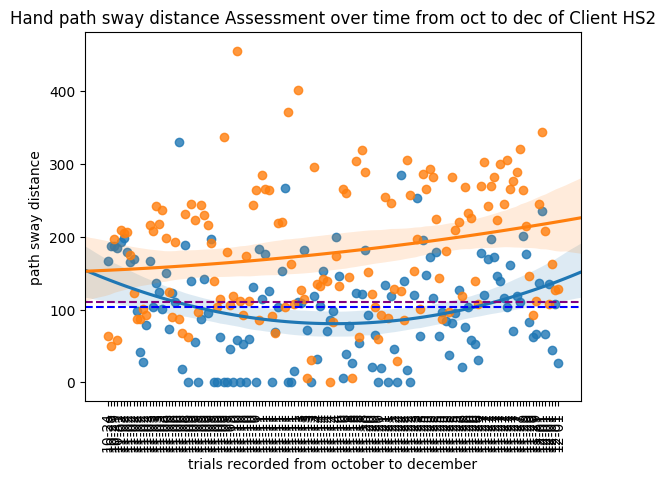

In [28]:
"""sns log plot"""
# pandas data frame
xx1 = np.linspace(0, stroke_length, stroke_length,endpoint=True)

dt_lin_left = pd.DataFrame({'x':xx1, 'y':stroke_left})
dt_lin_right = pd.DataFrame({'x':xx1, 'y':stroke_right})
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
sns.regplot(x='x', y='y', data=dt_lin_left,order=2)
sns.regplot(x='x',y='y',data=dt_lin_right,order=2)

plt.axhline(y= healthy_left_average, color = 'purple', linestyle='--')
plt.axhline(y= healthy_right_average, color = 'blue', linestyle='--')

plt.xticks(xx1,trial_label,rotation = 90)

plt.title("Hand path sway distance Assessment over time from oct to dec of Client HS2")
plt.xlabel("trials recorded from october to december")
plt.ylabel("path sway distance")

ax1.grid(False)

plt.show()